In [1]:
# Stock price prediction model



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
plt.style.use('fivethirtyeight')

In [119]:
df = web.DataReader('AMZN', data_source='yahoo',start='2011-01-01',end='2021-03-26')

In [120]:
print(df)
print(df.shape)

                   High          Low         Open        Close   Volume  \
Date                                                                      
2010-12-31   182.300003   179.509995   181.960007   180.000000  3451900   
2011-01-03   186.000000   181.210007   181.369995   184.220001  5331400   
2011-01-04   187.699997   183.779999   186.149994   185.009995  5031800   
2011-01-05   187.449997   184.070007   184.100006   187.419998  3418800   
2011-01-06   187.410004   185.250000   186.500000   185.860001  3179700   
...                 ...          ...          ...          ...      ...   
2021-03-22  3126.580078  3060.050049  3067.850098  3110.870117  2902200   
2021-03-23  3182.000000  3120.850098  3127.000000  3137.500000  3817300   
2021-03-24  3160.310059  3085.149902  3151.040039  3087.070068  2959000   
2021-03-25  3109.780029  3037.139893  3072.989990  3046.260010  3563500   
2021-03-26  3056.659912  2996.000000  3044.060059  3052.030029  3306700   

              Adj Close 

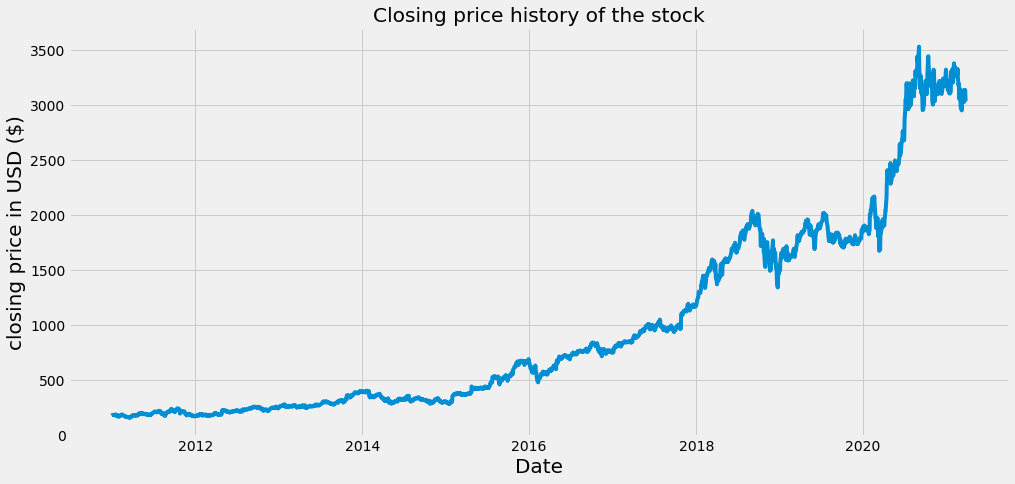

In [121]:
# Looking for the closing price of the stock

plt.figure(figsize=(15,7))
plt.title('Closing price history of the stock')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('closing price in USD ($)', fontsize=20)
plt.show()

In [122]:
# create a new dataframe with only the close column
data = df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values

# number of rows to train the data
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2061

In [123]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00564608],
       [0.00689813],
       [0.00713251],
       ...,
       [0.86815531],
       [0.85604723],
       [0.85775915]])

In [145]:
# Create the (scaled) training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into xtrain and ytrain

x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])
    if i<=120:
        print(x_train)
        print(y_train)
        print()


[array([0.00564608, 0.00689813, 0.00713251, 0.00784755, 0.0073847 ,
       0.00727493, 0.0070346 , 0.00693373, 0.00685659, 0.0072868 ,
       0.00824215, 0.00898388, 0.00768436, 0.0062276 , 0.00488061,
       0.0047115 , 0.00466699, 0.00427832, 0.00696637, 0.00301737,
       0.00257233, 0.00330517, 0.00372647, 0.00377988, 0.00443853,
       0.00458688, 0.00655396, 0.00721856, 0.00748855, 0.0083905 ,
       0.00873763, 0.00832522, 0.00761019, 0.00794842, 0.00757459,
       0.00577069, 0.00466105, 0.00497852, 0.00482721, 0.00365526,
       0.002513  , 0.00327847, 0.00350692, 0.00317462, 0.00240619,
       0.00175643, 0.00239729, 0.00153391, 0.00210653, 0.00170895,
       0.00121941, 0.00110667, 0.        , 0.00025219, 0.00105326,
       0.00048361, 0.00129062, 0.00300551, 0.0029699 , 0.00248629,
       0.00404987, 0.005474  , 0.00568465, 0.00568465, 0.00651836,
       0.00721559, 0.00646495, 0.00710285, 0.00704351, 0.00684472,
       0.00578849, 0.00632551, 0.00618606, 0.00564905, 0.0051

In [146]:
# converting the x_train and y_train to numpy arrays so that we can use them in the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

# reshaping the data for the convinience of the LSTM as it expects data to be in three dimensional

x_train.shape

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape



(1941, 120, 1)

In [147]:
# Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [148]:
# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [150]:
model.fit(x_train, y_train, batch_size=64,epochs=30)

Epoch 1/30
1941/1941 [==============================] - 6s 3ms/step - loss: 5.4550e-05
Epoch 2/30
1941/1941 [==============================] - 6s 3ms/step - loss: 4.0833e-05
Epoch 3/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.9576e-05
Epoch 4/30
1941/1941 [==============================] - 6s 3ms/step - loss: 4.0398e-05
Epoch 5/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.9098e-05
Epoch 6/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.9746e-05
Epoch 7/30
1941/1941 [==============================] - 7s 3ms/step - loss: 3.8527e-05
Epoch 8/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.7681e-05
Epoch 9/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.7625e-05
Epoch 10/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.7587e-05A: 
Epoch 11/30
1941/1941 [==============================] - 6s 3ms/step - loss: 3.7932e-05
Epoch 12/30
1941/1941 [===============

In [155]:
# creating the test dataset

test_data = scaled_data[training_data_len - 120: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])

In [156]:
# convert the data to numpy array

x_test = np.array(x_test)

In [157]:
# reshape the data

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [158]:
# getting the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [159]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

74.15019946191534


C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


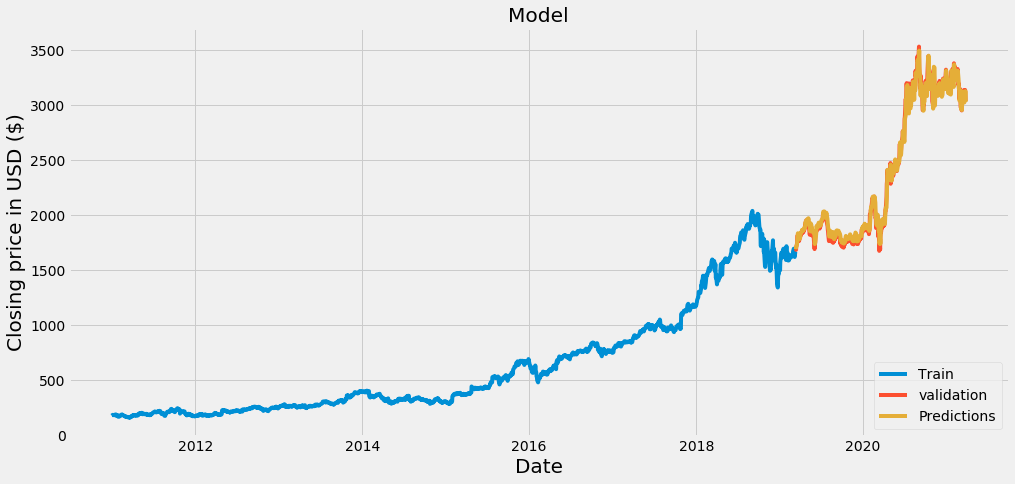

In [134]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data

plt.figure(figsize=(15,7))
plt.title('Model')
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Closing price in USD ($)', fontsize= 20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','validation','Predictions'], loc='lower right')
plt.show()

In [160]:
print(valid)

                  Close  Predictions
Date                                
2019-03-13  1690.810059  1691.836548
2019-03-14  1686.219971  1711.717896
2019-03-15  1712.359985  1714.097534
2019-03-18  1742.150024  1731.234131
2019-03-19  1761.849976  1758.574097
...                 ...          ...
2021-03-22  3110.870117  3044.652832
2021-03-23  3137.500000  3090.447021
2021-03-24  3087.070068  3127.185547
2021-03-25  3046.260010  3083.794922
2021-03-26  3052.030029  3031.230713

[515 rows x 2 columns]


In [163]:
ama = web.DataReader('AMZN', data_source='yahoo',start='2012-01-01',end='2021-03-22')
# create new dataframe
df1 = ama.filter(['Close'])
# getting the last 60 day closing price values
last_60_days = df1[-120:].values
#scale the data to 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create empty list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test to numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
# predicted scaled price
pred_price = model.predict(X_test)
# remove scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3008.1663]]


In [164]:
ama_2 = web.DataReader('AMZN', data_source='yahoo',start='2021-03-23',end='2021-03-23')
print(ama_2['Close'])

Date
2021-03-22    3110.870117
2021-03-23    3137.500000
Name: Close, dtype: float64


In [165]:
apple_2 = web.DataReader('AMZN', data_source='yahoo',start='2021-03-27',end='2021-03-27')
print(apple_2['Close'])

Date
2021-03-26    3052.030029
Name: Close, dtype: float64
